In [1]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:\\Users\\Deep\\Desktop\\ad_success_pred\\train.csv', encoding='utf-8')
test = pd.read_csv('C:\\Users\\Deep\\Desktop\\ad_success_pred\\test.csv', encoding='utf-8')

In [3]:
train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [4]:
test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [5]:
train.shape

(19536, 12)

In [6]:
test.shape

(6512, 11)

In [7]:
train.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
UserID                               19536 non-null object
realtionship_status                  19536 non-null object
industry                             19536 non-null object
genre                                19536 non-null object
targeted_sex                         19536 non-null object
average_runtime(minutes_per_week)    19536 non-null int64
airtime                              19536 non-null object
airlocation                          19536 non-null object
ratings                              19536 non-null float64
expensive                            19536 non-null object
money_back_guarantee                 19536 non-null object
netgain                              19536 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


# EDA

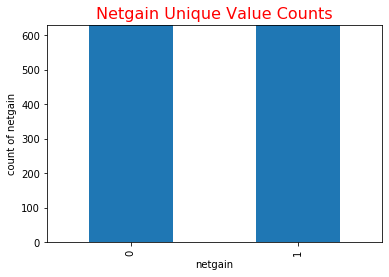

In [9]:
train['netgain'].value_counts().plot(kind = 'bar')
plt.xlabel('netgain')
plt.ylabel('count of netgain')
plt.title('Netgain Unique Value Counts',fontsize=16,color='Red')
plt.ylim(ymax=630)
plt.show()

In [10]:
## number of unique value in each column
for cols in train.columns:
    print(cols, '--> ',train[cols].nunique())

UserID -->  19536
realtionship_status -->  7
industry -->  6
genre -->  5
targeted_sex -->  2
average_runtime(minutes_per_week) -->  89
airtime -->  3
airlocation -->  42
ratings -->  120
expensive -->  3
money_back_guarantee -->  2
netgain -->  2


In [11]:
## Method to add percentage on the plot
def train_percentage(ax, total):
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x()+i.get_width()/2.,height + 5,'{:1.2f}'.format(height/total*100) + '%')

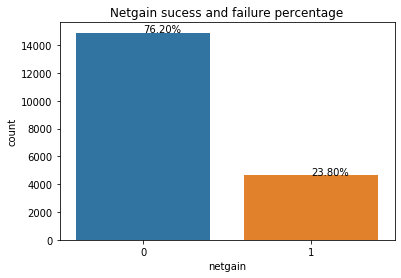

In [12]:
# As observed, around 76% of the ad campaigns are not successful.
# 0 - False = ad campaign not successful.
# 1 - True = ad campaign successful.

total = float(len(train))
plt.title('Netgain sucess and failure percentage')
ax = sns.countplot(x="netgain", data=train)
train_percentage(ax, total)

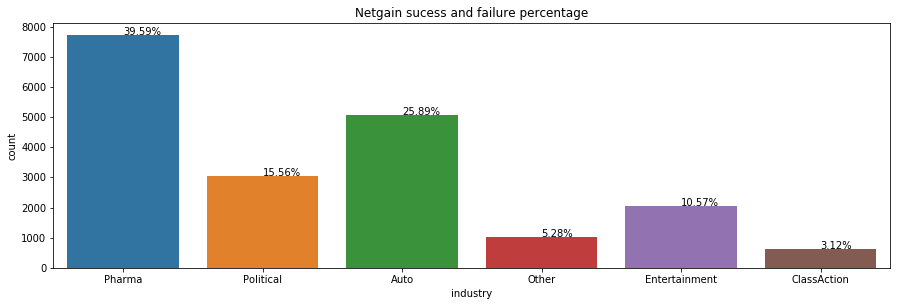

In [13]:
## As observed Pharma industry dominates the other sectors and has the highest count of more than 10000 observations realted to it.
## Around 40% of the industry sector is contributed to Pharma industry and it also has high count of successful ads.

total = float(len(train))
plt.figure(figsize=(15,4.5))
plt.title('Netgain sucess and failure percentage')
ax = sns.countplot(x="industry", data=train)

train_percentage(ax, total)

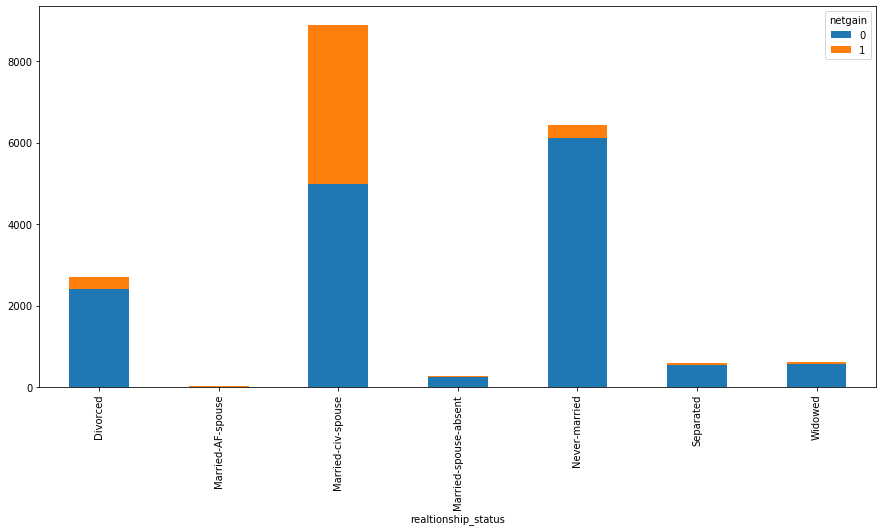

In [14]:
train.groupby(['realtionship_status'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

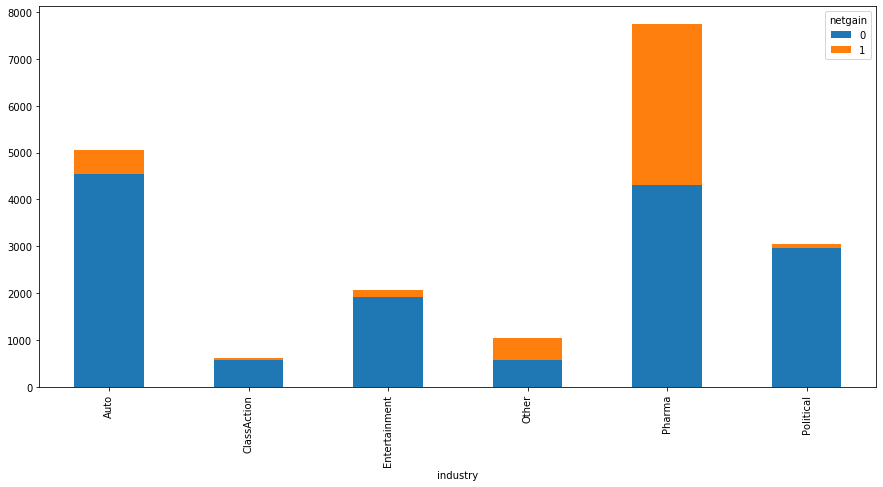

In [15]:
train.groupby(['industry'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

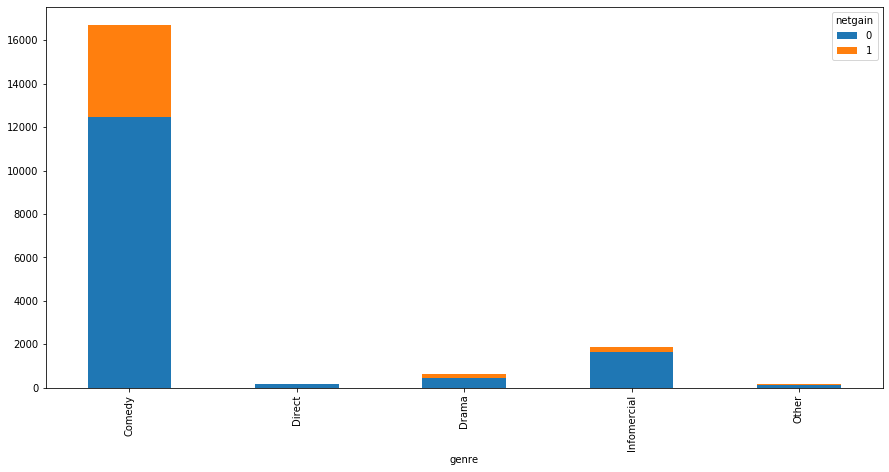

In [16]:
train.groupby(['genre'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

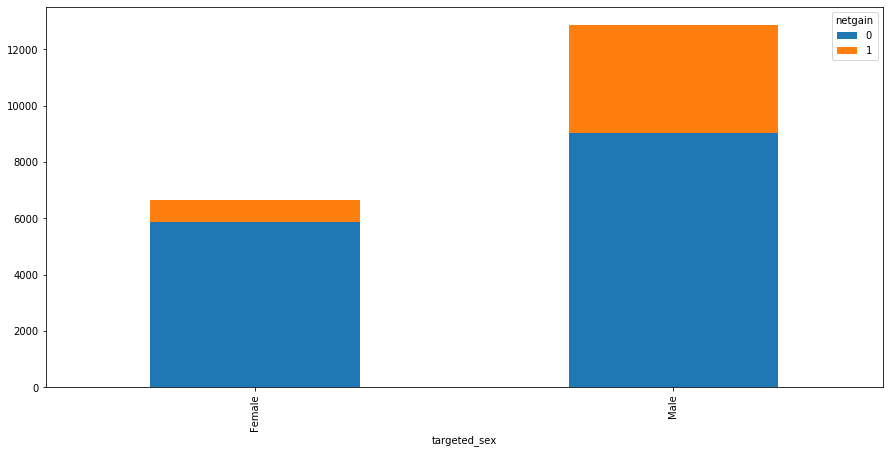

In [17]:
train.groupby(['targeted_sex'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

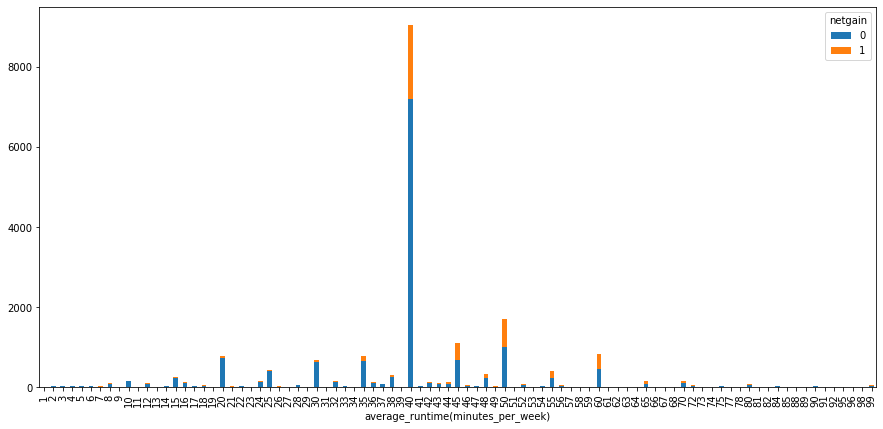

In [18]:
train.groupby(['average_runtime(minutes_per_week)'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

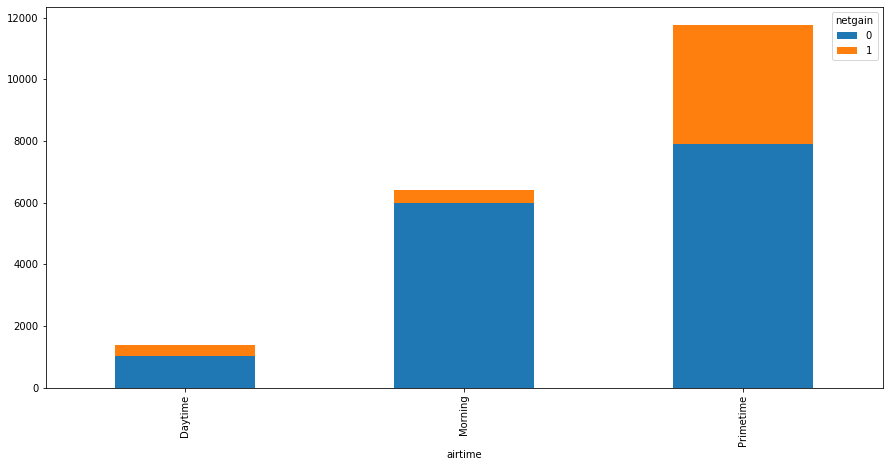

In [19]:
train.groupby(['airtime'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

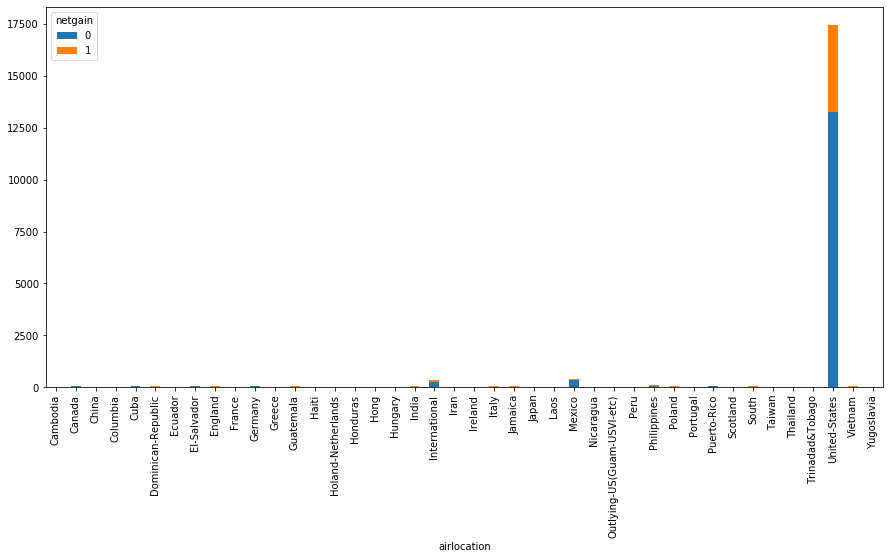

In [20]:
train.groupby(['airlocation'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

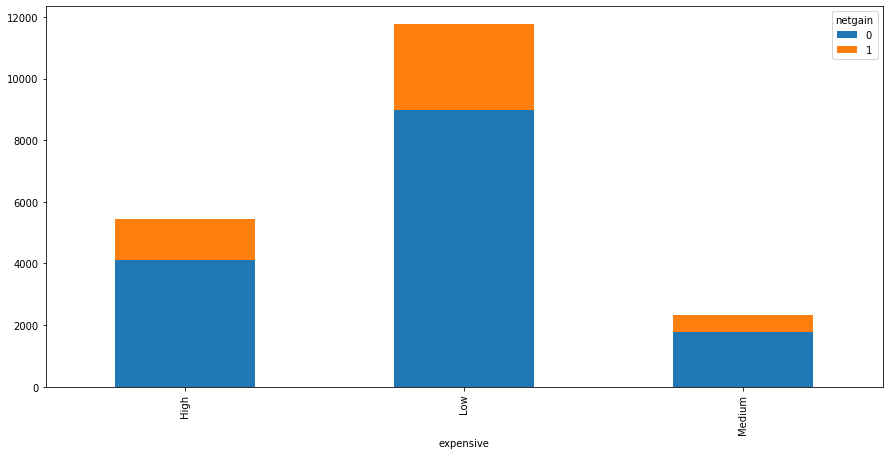

In [21]:
train.groupby(['expensive'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

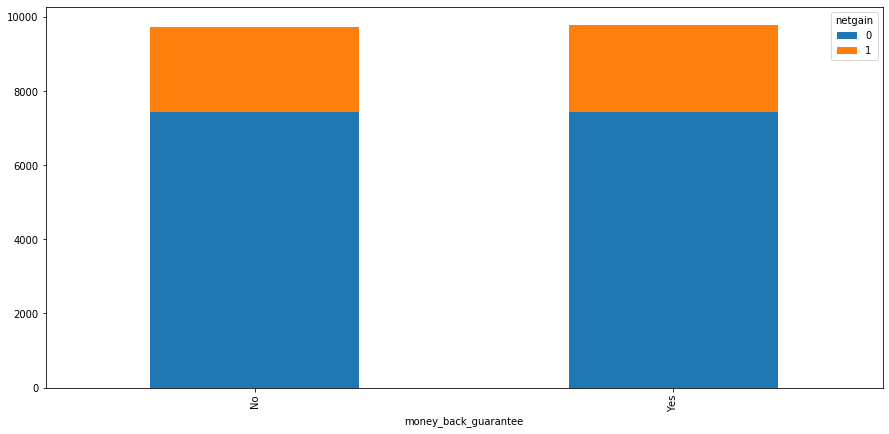

In [22]:
train.groupby(['money_back_guarantee'])['netgain'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

C:\Users\Deep\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1800x1440 with 0 Axes>

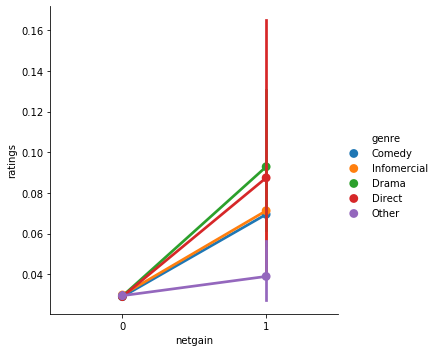

In [23]:
plt.figure(figsize=(25,20))
sns.factorplot(data=train,x='netgain',y='ratings',hue='genre')
plt.show()

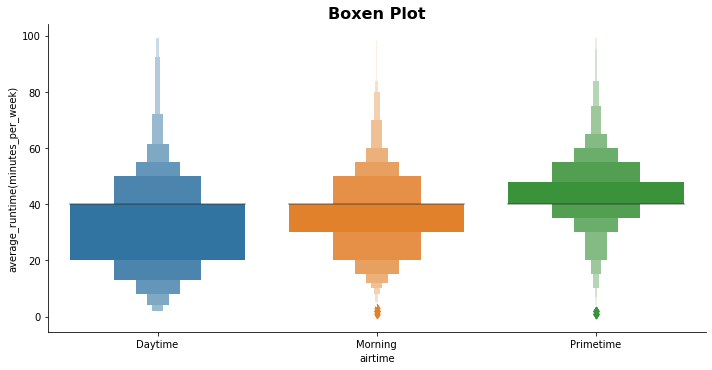

In [24]:
## Daytime ads are run more amount of time compared to the other airtimes. 
## From here it is also clear that average runtime of ads is between 40-50 mins/per week (approx).

sns.catplot(x='airtime', y='average_runtime(minutes_per_week)', data=train, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

<Figure size 14400x28800 with 0 Axes>

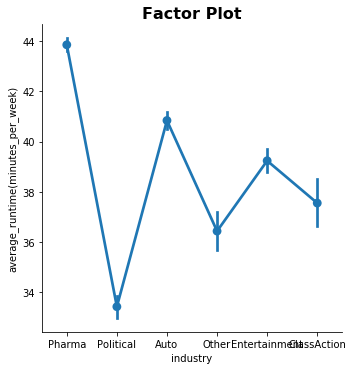

In [25]:
## Ads from pharma industry are aired more compared to others.

plt.figure(figsize=(200,400))
sns.factorplot(data=train,x='industry',y='average_runtime(minutes_per_week)')
plt.title('Factor Plot', weight='bold', fontsize=16)
plt.show()

In [26]:
## Dropping unnecessary User ID column
train.drop(['UserID'],1,inplace=True)
train

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
19531,Never-married,Auto,Infomercial,Male,40,Primetime,United-States,0.027465,High,Yes,0
19532,Never-married,Political,Drama,Female,15,Morning,United-States,0.027465,High,Yes,1
19533,Married-civ-spouse,Other,Comedy,Female,55,Primetime,United-States,0.027465,Low,Yes,0
19534,Never-married,Political,Comedy,Male,38,Primetime,United-States,0.027465,High,Yes,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
train["expensive"] = le.fit_transform(train["expensive"])

In [29]:
mean_encode = train.groupby('airlocation')['netgain'].mean()
print(mean_encode)

airlocation
Cambodia                      0.083333
Canada                        0.246154
China                         0.305556
Columbia                      0.166667
Cuba                          0.294118
Dominican-Republic            0.127660
Ecuador                       0.240000
El-Salvador                   0.171875
England                       0.285714
France                        0.300000
Germany                       0.320000
Greece                        0.166667
Guatemala                     0.160000
Haiti                         0.153846
Holand-Netherlands            0.000000
Honduras                      0.000000
Hong                          0.153846
Hungary                       0.142857
India                         0.387097
International                 0.278873
Iran                          0.193548
Ireland                       0.214286
Italy                         0.288462
Jamaica                       0.304348
Japan                         0.394737
Laos         

In [30]:
train.loc[:,'airlocation'] = train['airlocation'].map(mean_encode)

In [31]:
train = pd.get_dummies(train,drop_first=True)

# Splitting the independent and target variables.

In [32]:
X = train.drop('netgain',axis=1)
y = train['netgain']

In [33]:
X

,average_runtime(minutes_per_week),airlocation,ratings,expensive,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,...,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Male,airtime_Morning,airtime_Primetime,money_back_guarantee_Yes
0,40,0.240450,0.027465,2,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,35,0.278873,0.027465,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,40,0.240450,0.027465,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,40,0.240450,0.027465,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,1
4,50,0.240450,0.027465,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,40,0.240450,0.027465,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,1
19532,15,0.240450,0.027465,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
19533,55,0.240450,0.027465,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
19534,38,0.240450,0.027465,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1


In [34]:
X.shape

(19536, 23)

In [35]:
y

0        0
1        0
2        0
3        0
4        1
        ..
19531    0
19532    1
19533    0
19534    0
19535    0
Name: netgain, Length: 19536, dtype: int64

In [36]:
y.shape

(19536,)

In [37]:
X.columns

Index(['average_runtime(minutes_per_week)', 'airlocation', 'ratings',
       'expensive', 'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Separated',
       'realtionship_status_Widowed', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Direct', 'genre_Drama',
       'genre_Infomercial', 'genre_Other', 'targeted_sex_Male',
       'airtime_Morning', 'airtime_Primetime', 'money_back_guarantee_Yes'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [40]:
from imblearn.over_sampling import SMOTE 

Using TensorFlow backend.


In [41]:
smote = SMOTE()

In [43]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [44]:
rfr=RandomForestClassifier()
lr=LogisticRegression()
xgb=XGBClassifier()
et=ExtraTreeClassifier()
gr=GradientBoostingClassifier()

In [45]:
exp_tup={0:(lr,'LogisticRegressor'),1:(rfr,'RandomForestClassifier'),2:(xgb,'XGBClassifier'),3:(et,'ExtraTreeClassifier'),4:(gr,'GradientBoostingClassifier')}

In [47]:
res_ls = []
for k in exp_tup.keys():
    model = exp_tup[k][0]
    name = exp_tup[k][1]
    model.fit(X_train_smote,y_train_smote)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    F1_score = f1_score(y_test,y_pred)
    res_ls.append((name,precision,recall,accuracy,F1_score))
res_df = pd.DataFrame(res_ls)
res_df.columns = ['model','precision','recall','accuracy','F1_score']
res_df.sort_values('F1_score',ascending=False,inplace=True)

C:\Users\Deep\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
result=pd.DataFrame(res_df)
result

,model,precision,recall,accuracy,F1_score
4,GradientBoostingClassifier,0.487586,0.834432,0.757209,0.615509
2,XGBClassifier,0.494107,0.798535,0.762668,0.610473
1,RandomForestClassifier,0.480472,0.775092,0.752431,0.593216
0,LogisticRegressor,0.465214,0.813187,0.738782,0.591842
3,ExtraTreeClassifier,0.465213,0.734799,0.741512,0.569725


# Test Data Analysis

In [49]:
test.loc[:,'airlocation'] = test['airlocation'].map(mean_encode)

In [50]:
test["expensive"] = le.fit_transform(test["expensive"])

In [51]:
test.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee'],
      dtype='object')

In [52]:
test.drop('UserID',1,inplace=True)

In [53]:
test.columns

Index(['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee'],
      dtype='object')

In [54]:
test = pd.get_dummies(test,drop_first=True)

In [55]:
test.columns

Index(['average_runtime(minutes_per_week)', 'airlocation', 'ratings',
       'expensive', 'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Separated',
       'realtionship_status_Widowed', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Direct', 'genre_Drama',
       'genre_Infomercial', 'genre_Other', 'targeted_sex_Male',
       'airtime_Morning', 'airtime_Primetime', 'money_back_guarantee_Yes'],
      dtype='object')

In [56]:
features = ['average_runtime(minutes_per_week)', 'airlocation', 'ratings',
       'expensive', 'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Separated',
       'realtionship_status_Widowed', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Direct', 'genre_Drama',
       'genre_Infomercial', 'genre_Other', 'targeted_sex_Male',
       'airtime_Morning', 'airtime_Primetime', 'money_back_guarantee_Yes']
target = 'netgain'

In [57]:
final_model=GradientBoostingClassifier()
final_model.fit(train[features],train[target])
predictions = final_model.predict(test[features])

In [58]:
ad_submission = pd.DataFrame({'netgain':predictions})

In [59]:
ad_submission.to_csv("Submission File2.csv",index=False)